In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_cars = pd.read_csv("D:\Coding\Coursera\Data Prep for ML in Python Coursera\Data-Prep-for-ML\Feature Selection\indian cars dataset nonulls.csv")
df_cars

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Musawer Afzal\AppData\Local\Temp\ipykernel_9764\70570291.py:1: SyntaxWarning: invalid escape sequence '\C'
  df_cars = pd.read_csv("D:\Coding\Coursera\Data Prep for ML in Python Coursera\Data-Prep-for-ML\Feature Selection\indian cars dataset nonulls.csv")


,starting_price,reviews_count,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rp,fuel_tank_capacity,no_cylinder,rating,seating_capacity,fuel_type,engine_displacement,transmission_type,body_type
0,399000,51,89.0,3500,65.71,5500,27.0,3,4.5,5,Petrol,998,Automatic,Hatchback
1,799000,86,136.8,4400,101.65,6000,48.0,4,4.5,5,Petrol,1462,Automatic,SUV
2,1353000,242,300.0,2800,130.00,3750,57.0,4,4.5,4,Diesel,2184,Automatic,SUV
3,1318000,313,450.0,2800,182.38,3500,60.0,4,4.5,7,Diesel,2198,Automatic,SUV
4,1199000,107,400.0,2750,172.45,3500,57.0,4,4.5,7,Diesel,2198,Automatic,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,659000,35,500.0,5250,415.71,6750,45.0,4,4.5,5,Petrol,1991,Automatic,Hatchback
199,1041000,3,400.0,4400,254.79,5000,59.0,4,4.5,5,Petrol,1998,Automatic,Sedan
200,1615000,2,350.0,2500,167.67,3750,60.0,4,4.5,7,Diesel,1956,Manual,SUV
201,21700000,9,800.0,4500,591.39,6000,85.0,8,3.5,5,Petrol,3998,Automatic,SUV


In [3]:
# Target variable is continuous "starting_price"
target_varible = df_cars['starting_price']
target_varible

0        399000
1        799000
2       1353000
3       1318000
4       1199000
         ...   
198      659000
199     1041000
200     1615000
201    21700000
202      391000
Name: starting_price, Length: 203, dtype: int64

### Selecting or Removing Continuous feature using Pearson Correlation Coefficients

In [4]:
# Select numerical features only, make sure no the feature did not have One Hot Encoder applied on them
df_num = df_cars.select_dtypes(include=np.number).drop(['starting_price'], axis = 1)
df_num.head()

,reviews_count,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rp,fuel_tank_capacity,no_cylinder,rating,seating_capacity,engine_displacement
0,51,89.0,3500,65.71,5500,27.0,3,4.5,5,998
1,86,136.8,4400,101.65,6000,48.0,4,4.5,5,1462
2,242,300.0,2800,130.00,3750,57.0,4,4.5,4,2184
3,313,450.0,2800,182.38,3500,60.0,4,4.5,7,2198
4,107,400.0,2750,172.45,3500,57.0,4,4.5,7,2198


In [5]:
# Calculate correlation with target variable
corr_with_tgt = df_num.corrwith(target_varible).sort_values(ascending = False)
corr_with_tgt

max_power_bhp          0.670433
max_torque_nm          0.633948
engine_displacement    0.622474
no_cylinder            0.580439
fuel_tank_capacity     0.387282
max_torque_rpm         0.097321
max_power_rp           0.082065
rating                 0.027915
reviews_count         -0.217540
seating_capacity      -0.325104
dtype: float64

<Axes: xlabel='None', ylabel='None'>

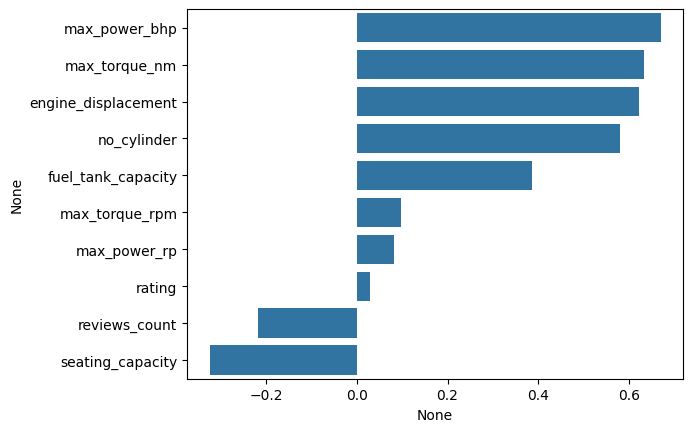

In [6]:
sns.barplot(x = corr_with_tgt, y = corr_with_tgt.index)

<Axes: >

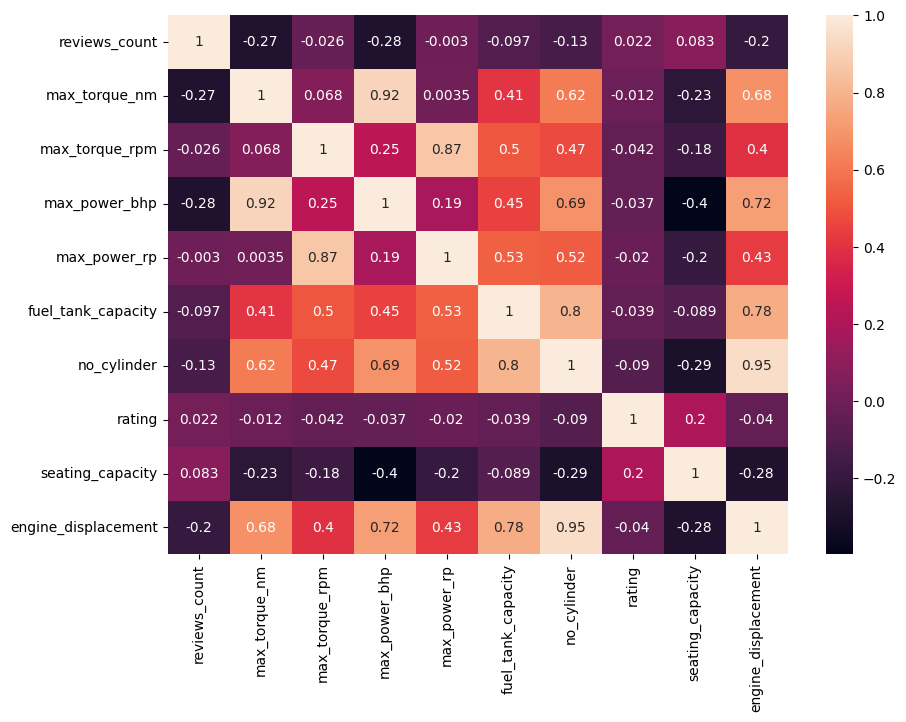

In [7]:
# Plot a heatmap of correlation coefficients
plt.rcParams['figure.figsize']=(10,7)
sns.heatmap(df_num.corr(), annot=True)

In [9]:
# Selecting and Removing Categorical Features using ANOVA F-score
# ANOVA only works on numerial data so we have to convert categorical data to numerical
df_cat = df_cars.select_dtypes(include = 'object')
df_cat

,fuel_type,transmission_type,body_type
0,Petrol,Automatic,Hatchback
1,Petrol,Automatic,SUV
2,Diesel,Automatic,SUV
3,Diesel,Automatic,SUV
4,Diesel,Automatic,SUV
...,...,...,...
198,Petrol,Automatic,Hatchback
199,Petrol,Automatic,Sedan
200,Diesel,Manual,SUV
201,Petrol,Automatic,SUV


In [ ]:
df_cat_enc = pd.get_dummies(df_cat)
df_cat_enc.head()

,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual,body_type_Convertible,body_type_Coupe,body_type_Hatchback,body_type_Hybrid,body_type_Luxury,body_type_MUV,body_type_Minivan,body_type_Pickup Truck,body_type_SUV,body_type_Sedan,body_type_Wagon
0,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False
1,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False
2,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
3,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
4,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False


In [11]:
# Import the required packages
from sklearn.feature_selection import SelectKBest, f_regression

In [12]:
# Define the x and y datasets
x = df_cat_enc
y = target_varible

# Define the feature selection algorigthm
f_test = SelectKBest(score_func=f_regression).fit(x, y)

# Define the f_test output results
f_output = pd.DataFrame()
f_output['feature'] = df_cat_enc.columns
f_output['f_score'] = f_test.scores_
f_output['p_value'] = f_test.pvalues_

f_output = f_output.sort_values(by=['p_value'])
f_output

,feature,f_score,p_value
7,body_type_Coupe,17.319896,0.000047
8,body_type_Hatchback,9.054517,0.002956
6,body_type_Convertible,8.689576,0.003579
1,fuel_type_Diesel,7.951657,0.005285
5,transmission_type_Manual,6.842157,0.009579
4,transmission_type_Automatic,6.842157,0.009579
3,fuel_type_Petrol,6.244906,0.013256
11,body_type_MUV,2.258347,0.134465
0,fuel_type_CNG,1.178104,0.279042
2,fuel_type_Electric,0.728557,0.394367


<Axes: xlabel='f_score', ylabel='feature'>

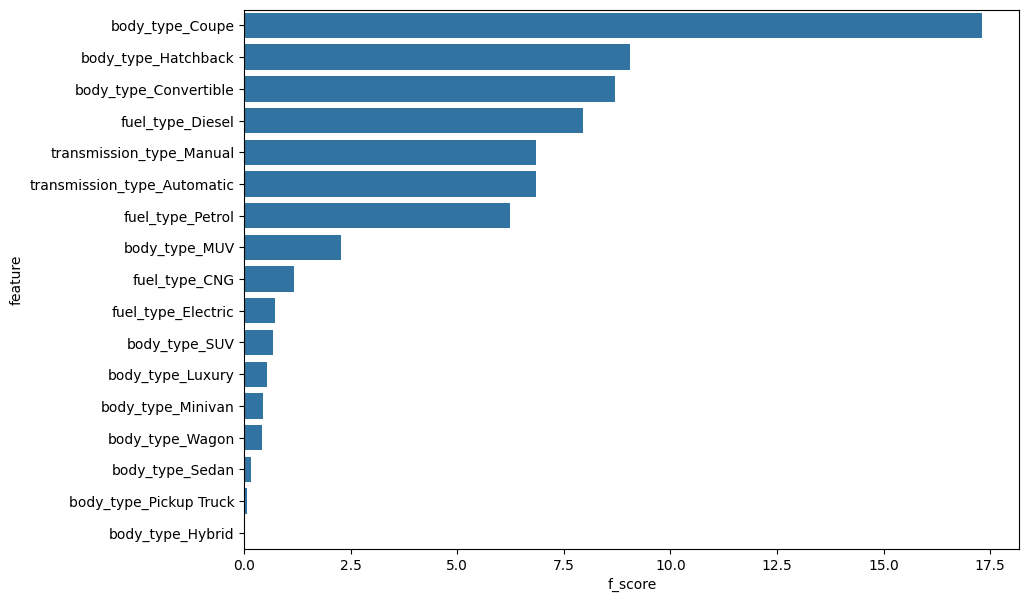

In [13]:
sns.barplot(data = f_output, x = 'f_score', y = 'feature')

### Automatic Feature Selection for Categorical values

In [14]:
df_cars = pd.read_csv("D:\Coding\Coursera\Data Prep for ML in Python Coursera\Data-Prep-for-ML\Feature Selection\indian cars dataset categorical nonulls.csv")
df_cars

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Musawer Afzal\AppData\Local\Temp\ipykernel_9764\1832340957.py:1: SyntaxWarning: invalid escape sequence '\C'
  df_cars = pd.read_csv("D:\Coding\Coursera\Data Prep for ML in Python Coursera\Data-Prep-for-ML\Feature Selection\indian cars dataset categorical nonulls.csv")


,starting_price_cat,reviews_count,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rp,fuel_tank_capacity,no_cylinder,rating,seating_capacity,fuel_type,engine_displacement,transmission_type,body_type
0,Up to 1M,51,89.0,3500,65.71,5500,27.0,3,4.5,5,Petrol,998,Automatic,Hatchback
1,Up to 1M,86,136.8,4400,101.65,6000,48.0,4,4.5,5,Petrol,1462,Automatic,SUV
2,1M to 5M,242,300.0,2800,130.00,3750,57.0,4,4.5,4,Diesel,2184,Automatic,SUV
3,1M to 5M,313,450.0,2800,182.38,3500,60.0,4,4.5,7,Diesel,2198,Automatic,SUV
4,1M to 5M,107,400.0,2750,172.45,3500,57.0,4,4.5,7,Diesel,2198,Automatic,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,Up to 1M,35,500.0,5250,415.71,6750,45.0,4,4.5,5,Petrol,1991,Automatic,Hatchback
199,1M to 5M,3,400.0,4400,254.79,5000,59.0,4,4.5,5,Petrol,1998,Automatic,Sedan
200,1M to 5M,2,350.0,2500,167.67,3750,60.0,4,4.5,7,Diesel,1956,Manual,SUV
201,Over 10M,9,800.0,4500,591.39,6000,85.0,8,3.5,5,Petrol,3998,Automatic,SUV


In [15]:
target_varible = df_cars['starting_price_cat']
target_varible

0      Up to 1M
1      Up to 1M
2      1M to 5M
3      1M to 5M
4      1M to 5M
         ...   
198    Up to 1M
199    1M to 5M
200    1M to 5M
201    Over 10M
202    Up to 1M
Name: starting_price_cat, Length: 203, dtype: object

In [16]:
# Get numeric variables
df_num = df_cars.select_dtypes(include = 'number')
df_num

,reviews_count,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rp,fuel_tank_capacity,no_cylinder,rating,seating_capacity,engine_displacement
0,51,89.0,3500,65.71,5500,27.0,3,4.5,5,998
1,86,136.8,4400,101.65,6000,48.0,4,4.5,5,1462
2,242,300.0,2800,130.00,3750,57.0,4,4.5,4,2184
3,313,450.0,2800,182.38,3500,60.0,4,4.5,7,2198
4,107,400.0,2750,172.45,3500,57.0,4,4.5,7,2198
...,...,...,...,...,...,...,...,...,...,...
198,35,500.0,5250,415.71,6750,45.0,4,4.5,5,1991
199,3,400.0,4400,254.79,5000,59.0,4,4.5,5,1998
200,2,350.0,2500,167.67,3750,60.0,4,4.5,7,1956
201,9,800.0,4500,591.39,6000,85.0,8,3.5,5,3998


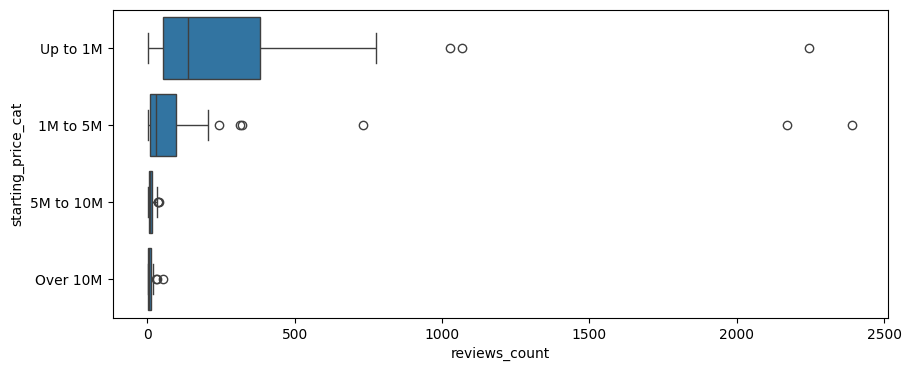

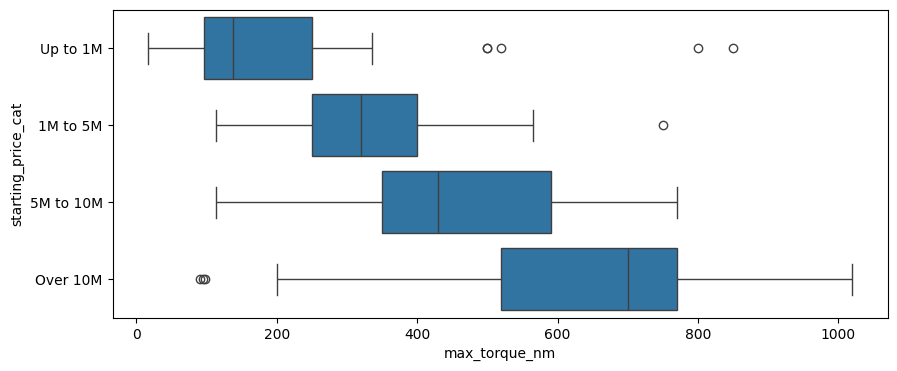

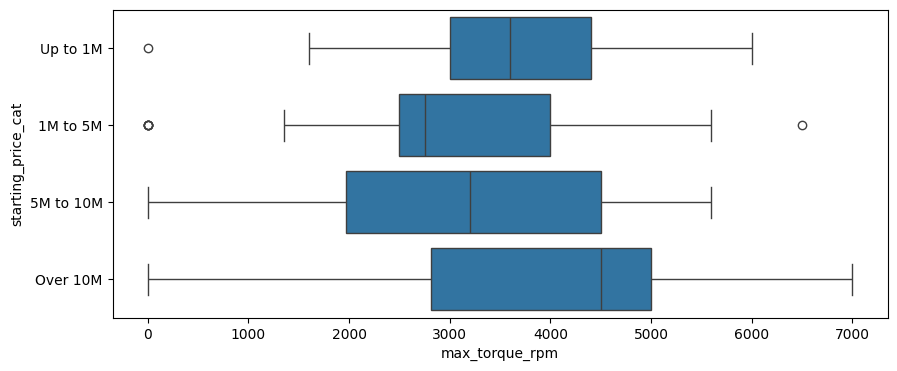

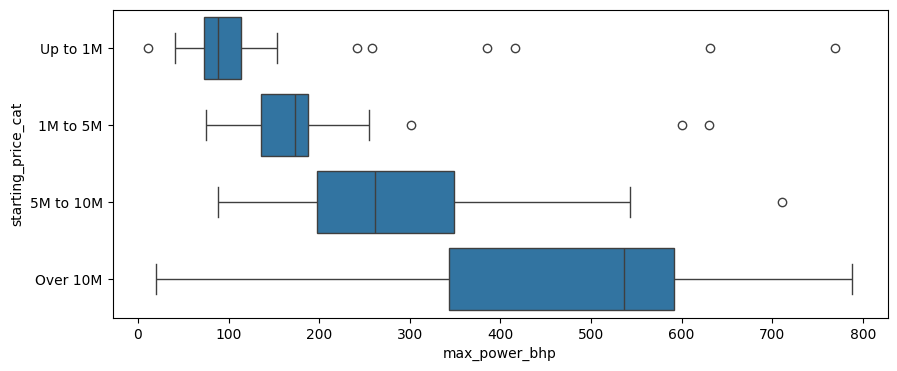

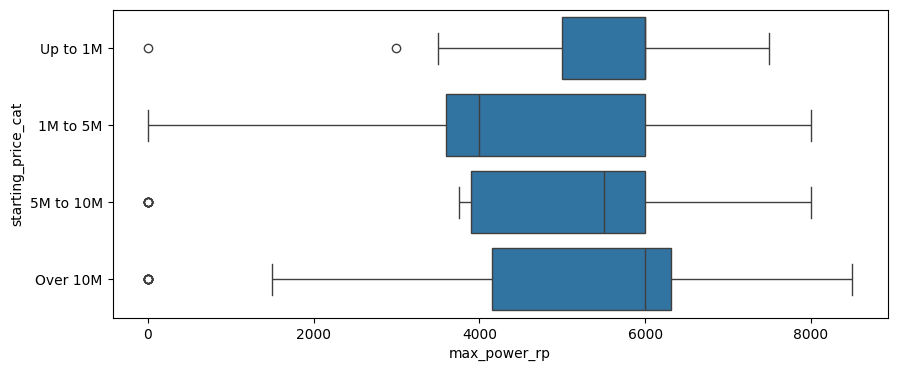

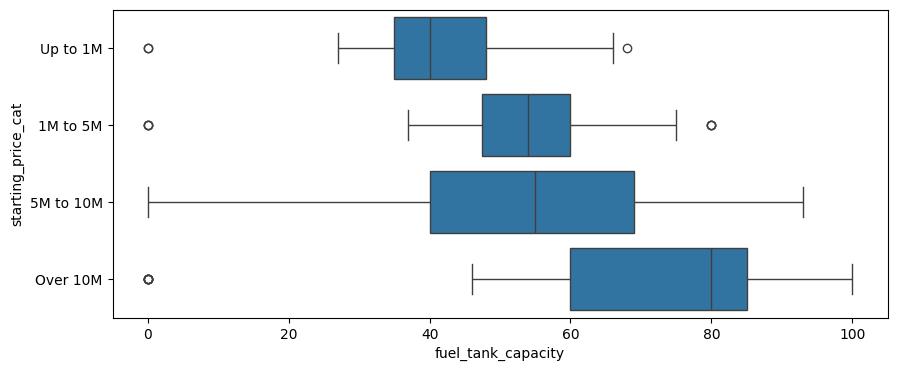

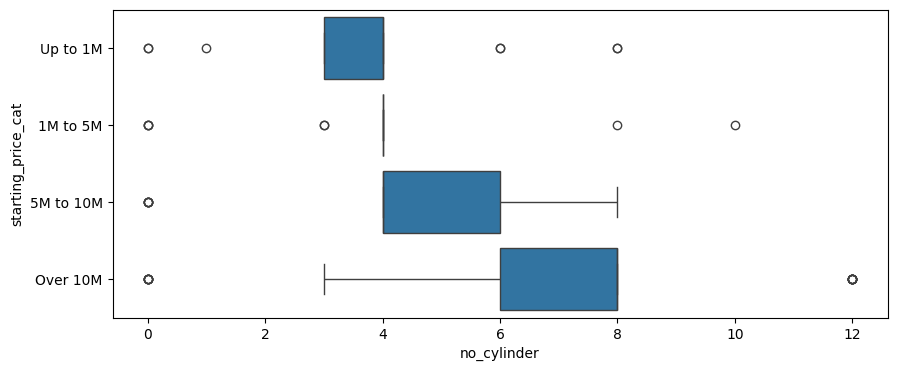

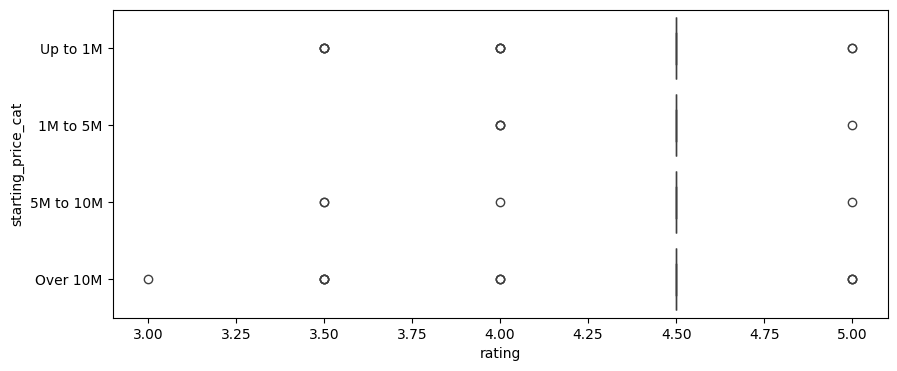

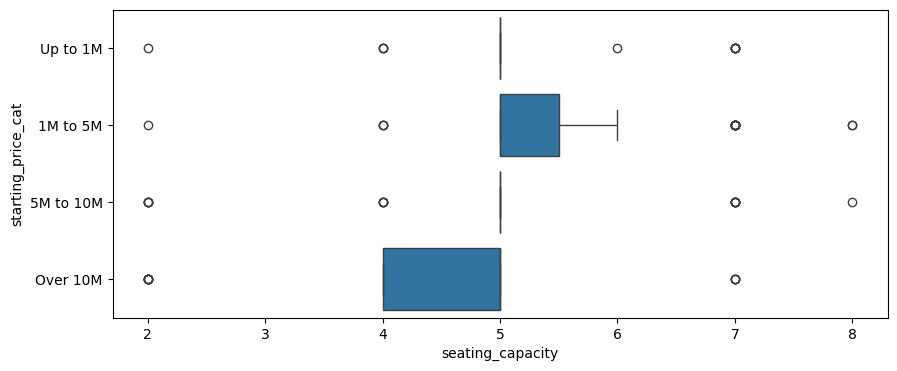

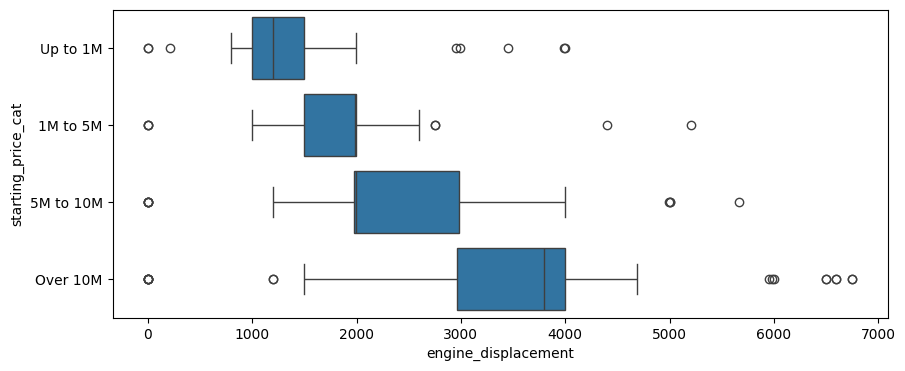

In [ ]:
for feature in df_num.columns:
    fig, (ax) = plt.subplots(1,1, figsize = (10,4))
    sns.boxplot(data = df_num, x = feature, y = target_varible, ax = ax)
    plt.show()

### Selecting or Removing Categorical Features using Chi Squared

In [18]:
df_cat = df_cars.select_dtypes(include = 'object').drop(['starting_price_cat'], axis = 1)
df_cat

,fuel_type,transmission_type,body_type
0,Petrol,Automatic,Hatchback
1,Petrol,Automatic,SUV
2,Diesel,Automatic,SUV
3,Diesel,Automatic,SUV
4,Diesel,Automatic,SUV
...,...,...,...
198,Petrol,Automatic,Hatchback
199,Petrol,Automatic,Sedan
200,Diesel,Manual,SUV
201,Petrol,Automatic,SUV


In [19]:
df_cat_end = pd.get_dummies(df_cat)
df_cat_end.head()

,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual,body_type_Convertible,body_type_Coupe,body_type_Hatchback,body_type_Hybrid,body_type_Luxury,body_type_MUV,body_type_Minivan,body_type_Pickup Truck,body_type_SUV,body_type_Sedan,body_type_Wagon
0,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False
1,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False
2,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
3,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
4,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False


In [20]:
from sklearn.feature_selection import chi2

In [23]:
x = df_cat_enc
y = target_varible

chi2_test = SelectKBest(score_func = chi2).fit(x, y)

chi2_output = pd.DataFrame()
chi2_output['feature'] = x.columns
chi2_output['f_score'] = chi2_test.scores_
chi2_output['p_value'] = chi2_test.pvalues_

chi2_output.sort_values(by = 'f_score', ascending = False)

chi2_output

,feature,f_score,p_value
0,fuel_type_CNG,6.415431,0.093058
1,fuel_type_Diesel,13.925385,0.003008
2,fuel_type_Electric,3.322946,0.344462
3,fuel_type_Petrol,3.222702,0.358547
4,transmission_type_Automatic,2.699096,0.440381
5,transmission_type_Manual,16.194578,0.001034
6,body_type_Convertible,9.183894,0.026943
7,body_type_Coupe,11.838454,0.007958
8,body_type_Hatchback,25.367133,0.000013
9,body_type_Hybrid,4.205128,0.240149


<Axes: xlabel='f_score', ylabel='feature'>

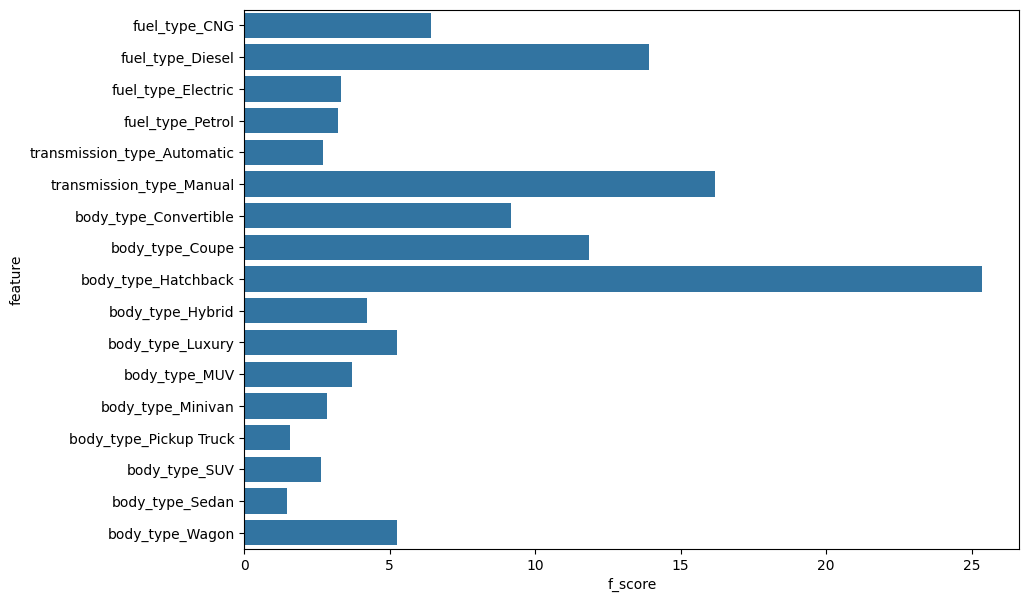

In [22]:
sns.barplot(data = chi2_output, x = 'f_score', y = 'feature')